# **<center>Brain Tumour Detection</center>**

In [42]:
!pip install watermark --quiet
%load_ext watermark
%watermark -a 'Ujjwal_Chowdhury' -v 

Author: Ujjwal_Chowdhury

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0



### **Library Loading**

In [25]:
import numpy as np
%watermark -p numpy
import pandas as pd
%watermark -p pandas
import matplotlib.pyplot as plt
%watermark -p matplotlib
plt.rcParams['font.size'] = '16'
import seaborn as sns
%watermark -p seaborn


import os # For reading the dataset
import cv2 # For Reading the images
%watermark -p cv2


import torch
import torch.nn as nn
%watermark -p torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image

import torchvision
%watermark -p torchvision
from torchvision import datasets, models, transforms , utils


from timeit import default_timer as timer

numpy: 1.19.5

pandas: 1.3.4

matplotlib: 3.4.3

seaborn: 0.11.2

cv2: 4.5.5

torch: 1.11.0+cu113

torchvision: 0.12.0+cu113



# Table of Contents

* [1. Problem Statement:](#h1)

* [2. Data Source and Description](#h2)
    * [2.1 Data Source](#h2_1)
    * [2.2 Data Description](#h2_2)
    * [2.3 EDA](#h2_3)
      * [2.3.1 Number of Images Per Sample Classes](#h2_3_1)
          * [2.3.1.a Dimension of Images per Sample Classes](#h2_3_1a)
      * [2.3.2 spliting the data into train and validation sets](#h2_3_2)
      * [2.3.3 Visulise random image example of each category](#h2_3_3)
           * [2.3.3.a Example of Training Data](#h2_3_3a)
           * [2.3.3.b Example of Validation Data](#h2_3_3b)


* [3. Report](#h3)

 
 
* [4. Data Preprocessing](#h4)
    * [4.1 Creating a Class for data preprocesing](#h4_1)
    * [4.2 Data Augmentation](#h4_2)
         * [4.2.1 A quick look after Augmentation](#h4_2_1)
  
  
* [5. Model Building](#h5)
    * [5.1 Definning Data Loader](#h5_1)
    * [5.3 Definning Loss Function](#h5_2)
    * [5.3 Definning Model](#h5_3)
    * [5.4 Loading Model](#h5_4)
      * [5.4.1 Freeze training for all "features" layers](#h5_4_1)
      * [5.4.2 Training the fullyconnected layers](#h5_4_2)
          * [5.4.2.a Implementing SGD with learning rate 0.001](#h5_4_2a)
              * [Loss and Accuracy curve for SGD with leaining rate 0.001](#h5_4_2_ap)
          * [5.4.2.b Accuracy using SGD with learning rate 0.001](#h5_4_2b)
          * [5.4.3 Training SGD with learning rate 0.05](#h5_4_3)
              * [Loss and Accuracy plot for SGD with learning rate 0.05](#h5_4_3p)
          * [5.4.3.b Accuracy using SGD with learning rate 0.05](#h5_4_3b)
          * [5.4.4 Implementing ADAM with learning rate 0.001](#h5_4_4)
              * [Loss and Accuracy curve for ADAM with leaining rate 0.001](#h5_4_4p)
          * [5.4.4.b Accuracy using ADAM with learning rate 0.001](#h5_4_4b) 
          * [5.4.5 Implementing ADAM with learning rate 0.05](#h5_4_5)
              * [Loss and Accuracy curve for ADAM with leaining rate 0.05](#h5_4_5p)
          * [5.4.6 Implementing RMSprop with learning rate 0.001](#h5_4_6)
              * [Loss and Accuracy curve for RMSprop with learning rate 0.001](#h5_4_6p)
          * [5.4.6.b Accuracy for RMSprop with learning rate 0.001 Â¶](#h5_4_6b)
          * [5.4.7 Implementing RMSprop with learning rate 0.05](#h5_4_7)
              * [Loss and Accuracy curve for RMSprop with learning rate 0.05](#h5_4_7p)
          * [5.4.7.b Accuracy using RMSprop with learning rate 0.001](#h5_4_7b)
          * [5.4.8 Implementing Adagrad with learning rate 0.001](#h5_4_8)
              * [Loss and Accuracy curve for Adagrad with learning rate 0.001](#h5_4_8p)
          * [5.4.8.b Accuracy using Adagrad with learning rate 0.001](#h5_4_8b)  
          * [5.4.9 Implementing Adagrad with learning rate 0.05 ](#h5_4_9)
              * [Loss and Accuracy curve for Adagrad with learning rate 0.05](#h5_4_9p)
          * [5.4.9.b Accuracy using Adagrad with learning rate 0.001](#h5_4_9b)
          * [5.5 Overall accuracies of different optimizers for different classes](#h5_5)
          * [5.6 Creating a new model from scratch using the previous results to improve the accuracy](#h5_6)

 
 * [6. Results:](#h6)
    
* [Reference](#r)

# 1. Problem Statement: <a class="anchor" id="h1"></a>

Radiology is a broad subject that needs more knowledge and understanding of medical science to identify tumors accurately. The need for a tumor detection program, thus, overcomes the lack of qualified radiologists. Using magnetic resonance imaging, biomedical image processing makes it easier to detect and locate brain tumors. In this study, a segmentation and detection method for brain tumors was developed using images from the MRI sequence as an input image to identify the tumor area. This process is difficult due to the wide variety of tumor tissues in the presence of different patients, and, in most cases, the similarity within normal tissues makes the task difficult. The main goal is to classify the brain in the presence of a brain tumor or a healthy brain.

# 2. Data Source and Description <a class="anchor" id="h2"></a>

## 2.1 Data Source: <a class="anchor" id="h2_1"></a>

This Dataset has been collected from [kaggle](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

## 2.2 Data Description: <a class="anchor" id="h2_2"></a>

This dataset is a combination of the following three datasets :

[figshare](https://figshare.com/articles/dataset/brain_tumor_dataset/1512427)

[SARTAJ dataset](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

[Br35H](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection?select=no)

This dataset contains 7022 images of human brain MRI images which are classified into 4 classes: glioma - meningioma - no tumor and pituitary.

no tumor class images were taken from the Br35H dataset.

## 2.3 EDA <a class="anchor" id="h2_3"></a>

In [32]:
# Path for the training data
training_path = 'C:/Users/Ujjwa/OneDrive/Desktop/Training/'

In [33]:
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

## 2.3.1 Number of Images Per Sample Classes <a class="anchor" id="h2_3_1"></a>

In [34]:
# Creating a function to count the number of files inside each folders of the directory
def data_count(path):
    counts = {}
    for root,dirs,files in os.walk(path):
        if files != [] and str(root.split('/')[-1]) in classes:
            counts[str(root.split('/')[-1])] = len(files)
    return counts

counts = data_count(training_path)

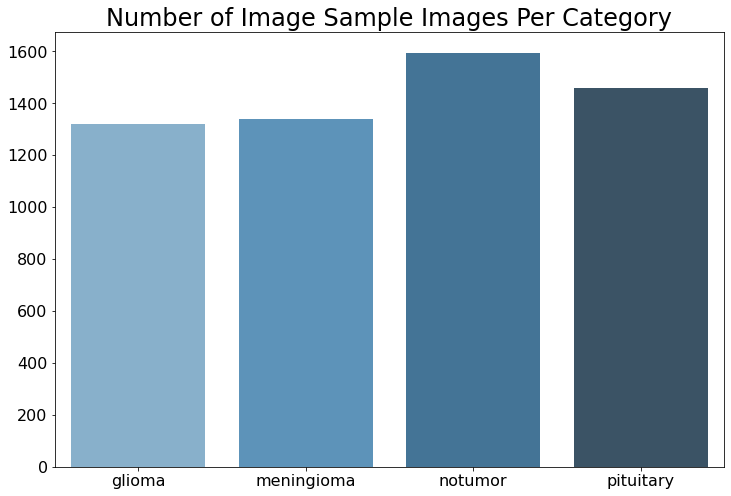

In [35]:

# Plot number of files per category
plt.figure(figsize=(12,8))

plt.title('Number of Image Sample Images Per Category', 
          fontsize=24)

sns.barplot(x = list(counts.keys()),
            y = list(counts.values()) , 
            palette="Blues_d" )

plt.show()

In [36]:
i=0
for folder in os.listdir(training_path):
    files=gb.glob(pathname=str(training_path+"//"+folder+"/*.jpg"))
    l= len(files)
    i=i+l
    print(f"Number of training images inside the  folder {folder} is {len(files)} ")
print(f"Total training images = {i}")

Number of training images inside the  folder glioma is 1321 
Number of training images inside the  folder meningioma is 1339 
Number of training images inside the  folder notumor is 1595 
Number of training images inside the  folder pituitary is 1457 
Total training images = 5712


### 2.3.1a Dimension of Images per Sample Classes <a class="anchor" id="h2_3_1a"></a>

In [41]:
def print_max_min_dim(folder_path):
    imageSizes = []
    for dirName, _, fileNames in os.walk(folder_path):
        for fileName in fileNames:
            imageSizes.append(Image.open(os.path.join(dirName, fileName), 'r').size)
    print("Max dim: ", max(imageSizes), ", Min dim :", min(imageSizes),'\n')

print('Dimension of images in Glioma Tumor catarory')
print_max_min_dim(training_path + "glioma")
print('Dimension of images in Meningioma Tumor catarory')
print_max_min_dim(training_path + "meningioma")
print('Dimension of images in No Tumor catarory')
print_max_min_dim(training_path + "notumor")
print('Dimension of images in Pituitary Tumor catarory')
print_max_min_dim(training_path + "pituitary")

Dimension of images in Glioma Tumor catarory
Max dim:  (512, 512) , Min dim : (512, 512) 

Dimension of images in Meningioma Tumor catarory
Max dim:  (1275, 1427) , Min dim : (180, 218) 

Dimension of images in No Tumor catarory
Max dim:  (1920, 1080) , Min dim : (150, 198) 

Dimension of images in Pituitary Tumor catarory
Max dim:  (1365, 1365) , Min dim : (201, 210) 



## 2.3.2 Spliting the data into train and validation sets <a class="anchor" id="h2_3_2"></a>

In [14]:
def data_split(path, split_percentage = 0.3):
    train_dict = {} # Dictionary to store training data
    valid_dict = {} # Dictionary to store validation data
    counts = data_count(path)
    for root,dirs,files in os.walk(path):
        if files != [] and str(root.split('/')[-1]) in classes:
            file_paths = [os.path.join(root,files[i]) for i in range(len(files))]
            
            valid_idxs = np.random.randint(low=0,high=len(files),size=int(len(files)*split_percentage))
            train_idxs = list(set(range(0,len(files))) - set(valid_idxs))
            
            train_dict[str(root.split('/')[-1])] = [file_paths[idx] for idx in train_idxs]
            valid_dict[str(root.split('/')[-1])] = [file_paths[idx] for idx in valid_idxs]
            
    return train_dict, valid_dict

train_dict, valid_dict = data_split(path) 

In [15]:
print('training data sizes : ', [len(l) for l in train_dict.values()])
print('validation data sizes : ', [len(l) for l in valid_dict.values()])

training data sizes :  [1179, 968, 1072, 993]
validation data sizes :  [478, 396, 437, 401]


## 2.3.3 Visulise random image example of each category <a class="anchor" id="h2_3_3"></a>

In [16]:
# Function to plot random image example
def visualize(data_dict):    
    idx = np.random.randint(0,min(list([len(l) for l in data_dict.values()])))

    plt.figure(figsize=(30,6))
    plt.subplot(161)
    plt.imshow(cv2.imread(train_dict['glioma'][idx]).astype(int))
    plt.title('Glioma')
    plt.subplot(162)
    plt.imshow(cv2.imread(train_dict['meningioma'][idx]).astype(int))
    plt.title('Menignoma')
    plt.subplot(163)
    plt.imshow(cv2.imread(train_dict['notumor'][idx]).astype(int))
    plt.title('No Tumor')
    plt.subplot(164)
    plt.imshow(cv2.imread(train_dict['pituitary'][idx]).astype(int))
    plt.title('Pituitary')

    plt.show()

### 2.3.3.a Example of Training Data <a class="anchor" id="h2_3_3a"></a>

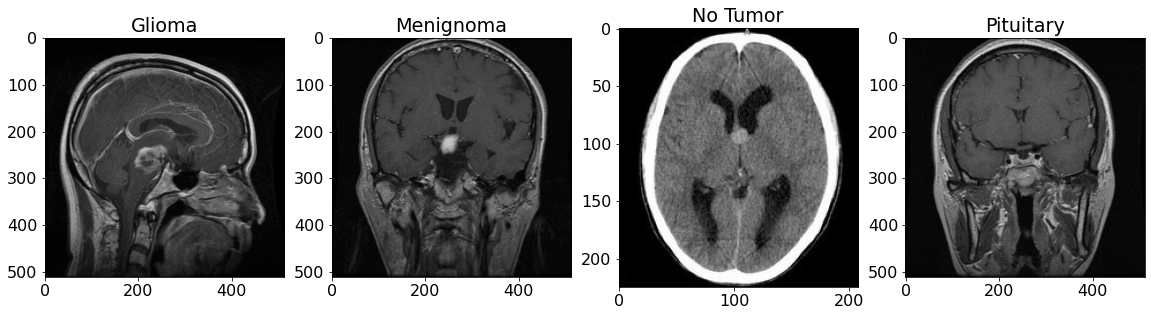

In [17]:
visualize(train_dict)

### 2.3.3.b Example of Validation Data <a class="anchor" id="h2_3_3b"></a>

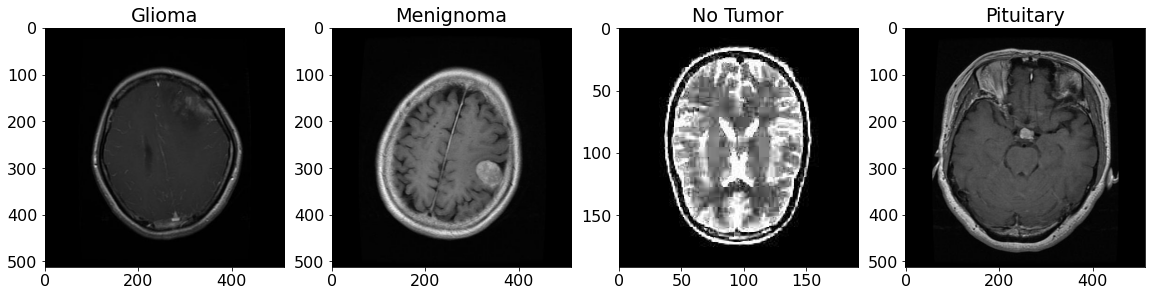

In [18]:
visualize(valid_dict)

# 3. Report <a class="anchor" id="h3"></a>

In this project first I have downloaded the dataset from kaggle. This dataset contains Brain MRI scans of several peoples. It has four category of images namely no tumor , glioma , meningioma and pituitary.

One of  most recent and famous image classification convolutional neural network architecture is VGG16 which can classify 1000 different level of images. In this project at first I have implemented this VGG16 architecture. Since VGG16 gives output in 1000 different classes but the dataset has only 4 so I had to do some modifications into the architecture. I had to replace the last fully connected layer of the model with a new one with 4 output features instead of 1000.

Data augmentation is also a very crusial as it use can lead to better prediction accuracy values when large size data sets are used. So I have implemented some data augmentations in the preprocessig phase.

Then I have implemented several optimizers and plot their loss and accuracy curves for both train and validation set for different initial learning rates.

In this expreiment I have found that adam and adagrd are giving higher accuracies. After comparing those two method of optimization I have selected adam with learning rate 0.001 in the final model.

The final model I have created is inspired by the VGG16 architecture. Here my goal was to increase the accuracy of the existing model. To increase the accuracy I have introduced batch normalization. Before feeding into the RELU activation function inside the CNN hidden layer , I have normalized the values , of after every convolution operation the batch normalization is done. Again inside the fully connected layer I have introduced droupout regularization to reduce the overfitting issues. This increases the overall accuracy and decrease the time to run each epoch.

# 4. Data Preprocessing <a class="anchor" id="h4"></a>

## 4.1 Creating a Class for data preprocesing <a class="anchor" id="h4_1"></a>

In [20]:
class MRIData(Dataset):
    
    def __init__(self, data_dict, transform=None):
        """
        Args:
            data_dict (dict): dictionary with class as key and the corresponding paths to the data of that class 
        """
        self.data_dict = data_dict
        self.transform = transform
        
    def __len__(self):
        return sum([len(l) for l in self.data_dict.values()])
    
    def __getitem__(self,idx):
        counts = [len(l) for l in self.data_dict.values()]
        sum_counts = list(np.cumsum(counts))
        sum_counts = [0] + sum_counts + [np.inf]
        
        for c,v in enumerate(sum_counts):
            if idx < v:
                i = (idx - sum_counts[c-1]) - 1
                break

        label = list(self.data_dict.keys())[c-1]
        img = Image.open(self.data_dict[str(label)][i]).convert('RGB')
        if self.transform:
            img = self.transform(img)
            
        return img, classes.index(str(label))

## 4.2 Data Augmentation <a class="anchor" id="h4_2"></a>

Data augmentation is useful to improve performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.

![**Figure 1:** Data Augmentation](https://research.aimultiple.com/wp-content/uploads/2021/04/data-augmentation-techniques.png)
**Figure 1:** Data Augmentation Techniques [source](https://research.aimultiple.com/data-augmentation-techniques/)



Since our dataset is large enough for VGG16, we need not to apply so many data transformations. 
Simple Verticle flip, horizontal flip and some basic filter like colorJitter and some Sharpness enhancement will be enough

In [21]:
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.RandomVerticalFlip(),
                                     transforms.RandomAdjustSharpness(sharpness_factor=1.5),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ColorJitter(),
                                     transforms.Resize((224,224))])

data_train = MRIData(train_dict,transform = data_transform)
data_valid = MRIData(valid_dict,transform = data_transform)

print("Total Number of training images : ", len(data_train))
print("Total Number of validation images : ", len(data_valid))

Total Number of training images :  4212
Total Number of validation images :  1712


### 4.2.1 A quick look after augmentation <a class="anchor" id="h4_2_1"></a>

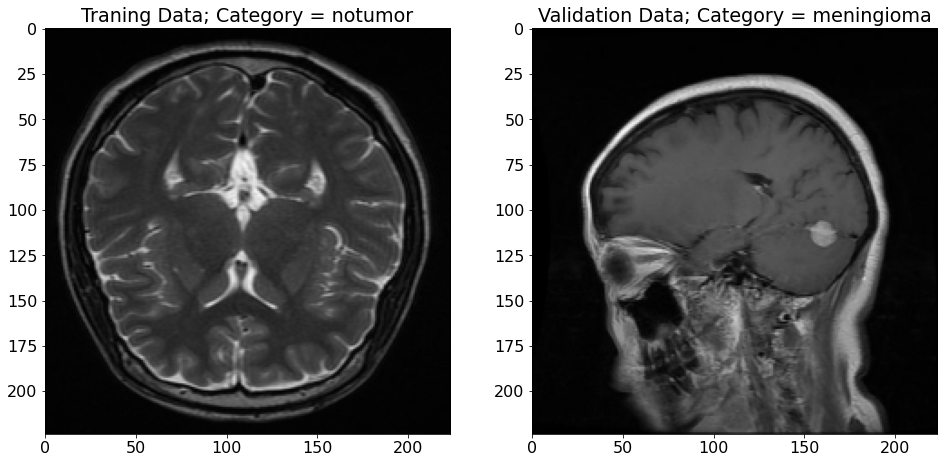

In [23]:
t_idx = np.random.randint(0,len(data_train))
v_idx = np.random.randint(0,len(data_valid))


t_img,t_label = data_train[t_idx]
v_img,v_label = data_valid[v_idx]

plt.figure(figsize=(16,9))
plt.subplot(121)
plt.imshow(t_img.numpy().transpose(1,2,0))
plt.title(f'Traning Data; Category = {classes[t_label]}')
plt.subplot(122)
plt.imshow(v_img.numpy().transpose(1,2,0))
plt.title(f'Validation Data; Category = {classes[v_label]}')
plt.show()

# 5. Model Building <a class="anchor" id="h5"></a>

## 5.1 Definning Data Loader <a class="anchor" id="h5_1"></a>

In [16]:
train_loader = DataLoader(data_train, batch_size=50, shuffle=True)
valid_loader = DataLoader(data_valid, batch_size=50, shuffle=True)

In [17]:
for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched[0].size(),sample_batched[1])
    print(type(sample_batched[0]))
    break

0 torch.Size([50, 3, 224, 224]) tensor([3, 2, 1, 0, 3, 0, 3, 2, 2, 3, 2, 1, 1, 0, 2, 3, 3, 0, 0, 2, 0, 3, 0, 0,
        3, 0, 0, 1, 0, 1, 2, 1, 2, 2, 3, 1, 2, 2, 2, 1, 3, 0, 2, 1, 2, 1, 0, 2,
        2, 2])
<class 'torch.Tensor'>


## 5.2 Definning Loss Function <a class="anchor" id="h5_2"></a>

In [18]:
criterion = nn.CrossEntropyLoss()

## 5.3 Definning Model <a class="anchor" id="h5_3"></a>

The [VGG-16](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html) is able to classify 1000 different labels; we just need 4 instead. 
In order to do that we are going replace the last fully connected layer of the model with a new one with 4 output features instead of 1000. 


![**Figure 2:** VGG 16](https://miro.medium.com/max/1400/1*NNifzsJ7tD2kAfBXt3AzEg.png)

**Figure 2:** VGG 16 Architecture [source](https://medium.com/mlearning-ai/an-overview-of-vgg16-and-nin-models-96e4bf398484)

In PyTorch, we can access the VGG-16 classifier with `model.classifier`, which is an 6-layer array. We will replace the last entry.

We can also disable training for the convolutional layers setting `requre_grad = False`, as we will only train the fully connected classifier.

## 5.4 Loading Model <a class="anchor" id="h5_4"></a>

In [19]:
#Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [20]:
print(vgg16.classifier[6].in_features) 
print(vgg16.classifier[6].out_features)

4096
1000


### 5.4.1 Freeze training for all "features" layers <a class="anchor" id="h5_4_1"></a>

In [21]:
for param in vgg16.features.parameters():
    param.requires_grad = False

In [22]:
n_inputs = vgg16.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(classes))

vgg16.classifier[6] = last_layer

# if GPU is available, move the model to GPU
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    print("training on gpu...")
    vgg16.cuda()
else:
    print("no gpu found.")

# check to see that your last layer produces the expected number of outputs
print(vgg16.classifier[6].out_features)
print(vgg16)

training on gpu...
4
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, 

### 5.4.2 Training the fullyconnected layers <a class="anchor" id="h5_4_2"></a>

In [23]:
def base_model_build():
    #Load the pretrained model from pytorch
    vgg16 = models.vgg16(pretrained=True)

    # print out the model structure
    #print(vgg16)
    
    # Freeze training for all "features" layers
    for param in vgg16.features.parameters():
        param.requires_grad = False
        
    import torch.nn as nn

    n_inputs = vgg16.classifier[6].in_features

    # add last linear layer (n_inputs -> 5 flower classes)
    # new layers automatically have requires_grad = True
    last_layer = nn.Linear(n_inputs, len(classes))

    vgg16.classifier[6] = last_layer

    # if GPU is available, move the model to GPU
    train_on_gpu = torch.cuda.is_available()
    if train_on_gpu:
        print("training on gpu...")
        vgg16.cuda()
    else:
        print("no gpu found.")

    # check to see that your last layer produces the expected number of outputs
    #print(vgg16.classifier[6].out_features)
    #print(vgg16)
    
    return vgg16


def loss_acc_visuaize(history,optim,path):
    plt.figure(figsize=(20,10))

    plt.suptitle(str(optim))

    plt.subplot(121)
    plt.plot(history['train_loss'],label='train_loss')
    plt.plot(history['valid_loss'],label='valid_loss')
    plt.legend()
    plt.title('Loss Curves')

    plt.subplot(122)
    plt.plot(history['train_acc'],label='train_acc')
    plt.plot(history['valid_acc'],label='valid_acc')
    plt.legend()
    plt.title('Accuracy Curves')
    
    plt.savefig(str(path) + 'loss_acc.png')




def visual_predict(model,data=data_valid):
    c = np.random.randint(0,len(data))
    img, label = data[c]

    with torch.no_grad():
            model.eval()
            # Model outputs log probabilities
            out = model(img.view(1,3,224,224).cuda())
            out = torch.exp(out)
            print(out)

    plt.figure(figsize = (10,5))
    plt.subplot(121)
    plt.imshow(img.numpy().transpose((1,2,0)))
    plt.title(str(classes[label]))
    plt.subplot(122)
    plt.barh(classes,out.cpu().numpy()[0])

    plt.show()
    

def class_accuracies(model,data_dict=valid_dict,classes=classes):
    accuracy_dict = {}
    with torch.no_grad():
        model.eval()
        for c in data_dict.keys():
            correct_count = 0
            total_count = len(data_dict[str(c)])
            gt = classes.index(str(c))
            for path in data_dict[str(c)]:
                #print(path)
                im = Image.open(path).convert('RGB')
                #im.show()
                im = transforms.ToTensor()(im)
                im = transforms.Resize((224,224))(im)
                out = model(im.view(1,3,224,224).cuda())
                #print(out)
                out = torch.exp(out)
                pred = list(out.cpu().numpy()[0])
                #print(pred)
                pred = pred.index(max(pred))
                #print(pred,gt)

                if gt == pred:
                    correct_count += 1
            print(f"Accuracy for class {str(c)} : ",correct_count/total_count)
            accuracy_dict[str(c)] = correct_count/total_count
    return accuracy_dict

It is very important to select a good optimizer for our model during the training process, to make our predictions as correct as possible with a relatively smaller number of epochs.
![**Optimizers**](https://ml-cheatsheet.readthedocs.io/en/latest/_images/optimizers.gif)

[source](https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html#adagrad)


#### 5.4.2.a Implementing SGD with learning rate 0.001 <a class="anchor" id="h5_4_2a"></a>

### SGD (Stochastic Gradient Descent)

SGD is a optimizer used for fit the neural network, this technique is based by Gradient Descent.
In SGD is used the matriz representation, the equation for represent the update the weights is bellow.

$$ V_{k+1} = V_k - \eta . \nabla L(W_{ij}) $$
<br/>
$$  W = V_{k+1}  $$

Where the **Î·** is the step size, and the **âˆ‡L(W)** is the gradient of the Loss.

The gradient can be solved using the chain rule of the derivate the Loss funtion by Weights. The equation for output layer is bellow.

$$ \nabla L(W_{ij}) = \dfrac{dL(W_{ij})}{dW_{ij}} $$
<br/>
$$ =\dfrac{dL(t|y)}{dy}.\dfrac{dy}{dZ}.\dfrac{dZ}{dW_{ij}} $$
<br/>

<br/>
<center>For the hidden layer:</center>
<br/>
$$ \nabla L(W_{ij}) = \dfrac{dL(W_{ij})}{dW_{ij}} $$
<br/>
$$ =\dfrac{dL(t|y_{ij})}{dy_{ij}}.\dfrac{dy_{ij}}{dZ_{ij}}.\dfrac{dZ_{ij}}{dy_{ij}}.\dfrac{dy_{ij}}{dZ_{ij}}.\dfrac{dZ_{ij}}{dW_{ij}} $$

In [24]:
vgg16=base_model_build()
optimizer_sgd = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

model=vgg16
criterion=criterion
optimizer=optimizer_sgd
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-sgd-lr=0.001'
max_epochs_stop=20
n_epochs=40
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 125.07 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 1.0642 	Validation Loss: 0.8169
		Training Accuracy: 57.02%	 Validation Accuracy: 76.75%
Epoch: 1	100.00% complete. 94.18 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.7655 	Validation Loss: 0.6460
		Training Accuracy: 73.05%	 Validation Accuracy: 80.90%
Epoch: 2	100.00% complete. 94.12 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.6415 	Validation Loss: 0.5566
		Training Accuracy: 77.57%	 Validation Accuracy: 83.59%
Epoch: 3	100.00% complete. 93.02 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.5685 	Validation Loss: 0.5099
		Training Accuracy: 80.28%	 Validation Accuracy: 83.76%
Epoch: 4	100.00% complete. 95.00 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.5285 	Validation Loss: 0.4901
		Training Accuracy: 80.52%	 Validation Accuracy: 83.18%
Epoch: 5	100.00% complete. 93.96 seconds elapsed in epoch.
Epoch: 5 	Training Loss

## Loss and Accuracy curve for SGD with leaining rate 0.001 <a class="anchor" id="h5_4_2_ap"></a>

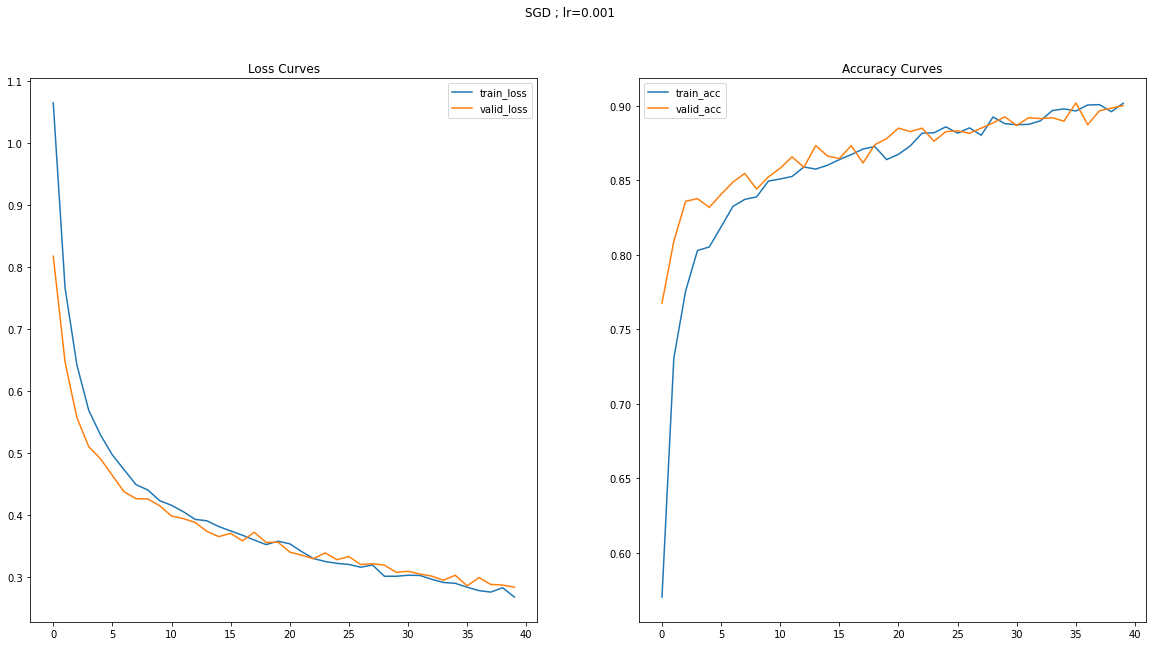

In [25]:
loss_acc_visuaize(history,optim='SGD ; lr=0.001',path='../')

Looking at the plot we can say that the loss curve is decreasing slowly and gradually. Thus the rate of convergence is slower here.

In [27]:
model = base_model_build()
model.load_state_dict(torch.load("../vgg16-transfer-sgd-lr=0.001"))

training on gpu...


<All keys matched successfully>

tensor([[1.2284e-02, 6.5823e-01, 1.3472e+02, 1.3678e+00]], device='cuda:0')


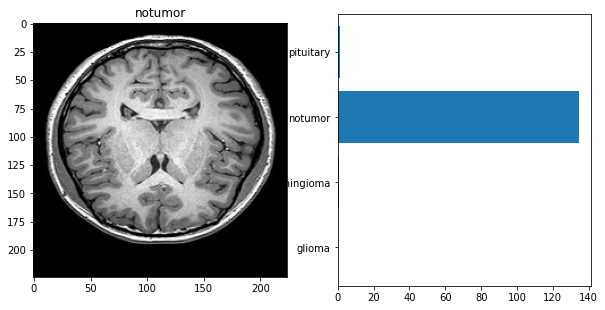

In [28]:
visual_predict(model=model)

### 5.4.2.b Accuracy using SGD with learning rate 0.001 <a class="anchor" id="h5_4_2b"></a>

In [29]:
sgd_lr001_dict = class_accuracies(model=model)

Accuracy for class pituitary :  0.965675057208238
Accuracy for class notumor :  0.9581589958158996
Accuracy for class meningioma :  0.7980049875311721
Accuracy for class glioma :  0.8560606060606061


Accuracy for Pituitary and No Tumor is high but for Meningioma and Glioma is pretty low. For our final model we may not cosider SGD with learning rate 0.001.

### 5.4.3 Training SGD with learning rate 0.05 <a class="anchor" id="h5_4_3"></a>

In [30]:
# SGD with high learning rate

vgg16 = base_model_build()
optimizer_sgd = optim.SGD(vgg16.classifier.parameters(), lr=0.05)

model=vgg16
criterion=criterion
optimizer=optimizer_sgd
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-sgd-lr=0.05'
max_epochs_stop=20
n_epochs=40
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 96.21 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.6375 	Validation Loss: 0.3536
		Training Accuracy: 76.83%	 Validation Accuracy: 87.50%
Epoch: 1	100.00% complete. 95.68 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.3594 	Validation Loss: 0.4792
		Training Accuracy: 86.62%	 Validation Accuracy: 82.89%
Epoch: 2	100.00% complete. 95.53 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.2887 	Validation Loss: 0.4323
		Training Accuracy: 88.98%	 Validation Accuracy: 85.05%
Epoch: 3	100.00% complete. 95.28 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.2558 	Validation Loss: 0.2857
		Training Accuracy: 90.09%	 Validation Accuracy: 90.54%
Epoch: 4	100.00% complete. 95.03 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.2119 	Validation Loss: 0.2113
		Training Accuracy: 92.01%	 Validation Accuracy: 92.11%
Epoch: 5	100.00% complete. 95.85 seconds elapsed in epoch.
Epoch: 5 	Training Loss:

## Loss and Accuracy plot for SGD with learning rate 0.05<a class="anchor" id="h5_4_3p"></a>

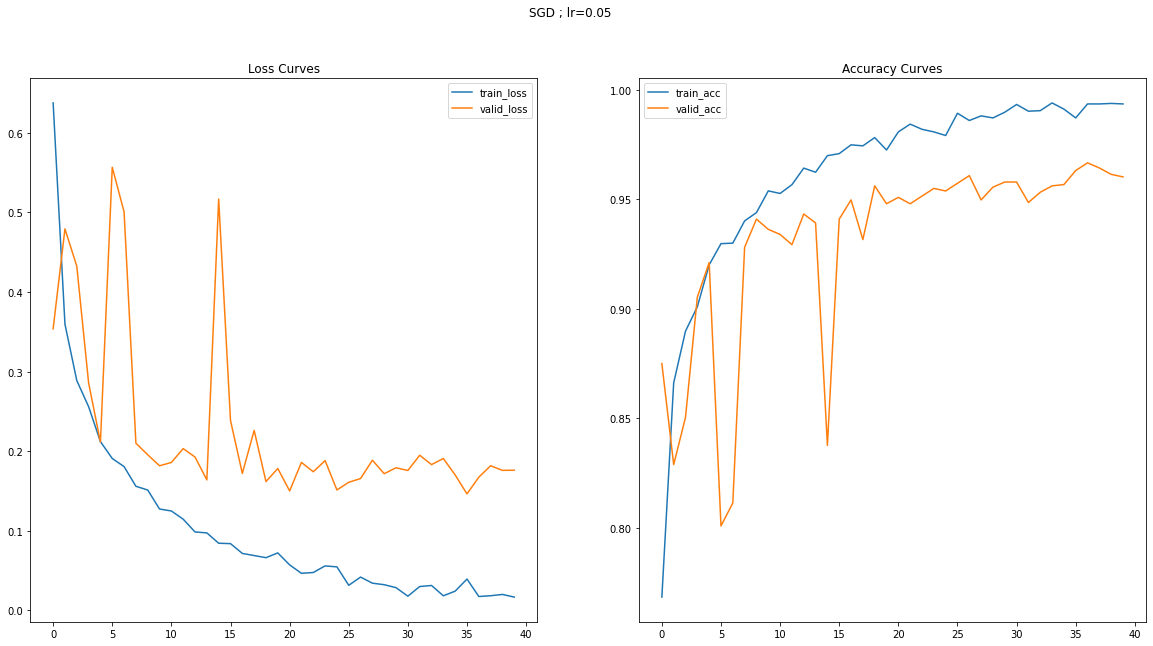

In [31]:
loss_acc_visuaize(history,optim='SGD ; lr=0.05',path='../lr=0.05')

SGD with a high learning rate is not a good idea for our model as the validation loss curve not decreasing after 16-th epochs and may converges to a noise ball.
We will not use this in our final model.

In [33]:
model = base_model_build()
model.load_state_dict(torch.load("../vgg16-transfer-sgd-lr=0.05"))

training on gpu...


<All keys matched successfully>

tensor([[4.4478e-06, 6.1424e-02, 7.0340e+05, 5.4668e+00]], device='cuda:0')


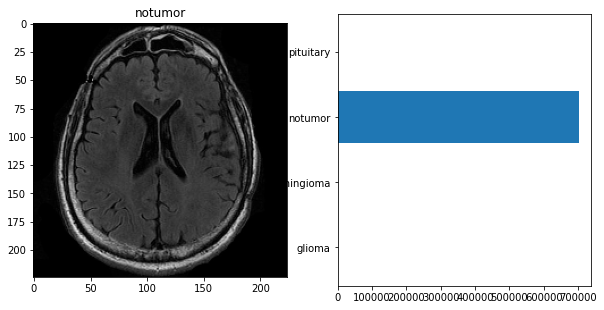

In [34]:
visual_predict(model=model)

### 5.4.3.b Accuracy using SGD with learning rate 0.05 <a class="anchor" id="h5_4_3b"></a>

In [35]:
sgd_lr05_dict = class_accuracies(model=model)

Accuracy for class pituitary :  0.9794050343249427
Accuracy for class notumor :  0.9832635983263598
Accuracy for class meningioma :  0.9476309226932669
Accuracy for class glioma :  0.952020202020202


### 5.4.4 Implementing ADAM with learning rate 0.001 <a class="anchor" id="h5_4_4"></a>

Adam stands for Adaptive Moment Estimation. In addition to storing an exponentially decaying average of past squared gradients like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients, similar to momentum.

Mathematically, Adam works thusly. We start by computing estimates of the mean and variance (first and second moments) of the gradient, using the following formula:

$$m_t = \beta_1 m_{t - 1} + (1 - \beta_1)g_t$$
$$v_t = \beta_1 v_{t - 1} + (1 - \beta_2)g_t^2$$

Where $v_t$ is an exponentially decaying average of past squared gradients and $m_t$ is an exponentially decaying average of past gradients. Notice that these are parts of the formulas for RMSprop/Adagrad/Adadelta and Momentum, respectively. $\beta_1$ and $\beta_2$ are the decay rates, which control the relative contribution of past history versus the present gradient; these values are usually very large, e.g. very heavily biased towards the past as opposed to the present.

The problem with using these values in an update rule is that they are biased towards 0, since $m$ and $v$ are initialized as zero vectors on the first algorithm run. Adam therefore introduces a further bias correction to its formula:

$$\hat{m}_t = \frac{m_t}{1 - \beta_1}$$
$$\hat{v}_t = \frac{v_t}{1 - \beta_2}$$

We plug these corrected, momentum-using values into the same adaptive learning rate formula used by RMSprop and family:

$$\theta_{t + 1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$$

Thus Adam is basically RMSprop plus momentum. The pathfinding of the Adam algorithm is essentially that of a ball with both momentum and friction. Adam biases the path the agorithm takes towards flat minima in the error surface, slowing down learning when moving along a large gradient.

Adam is one of the most popular optimization algorithms at present, largely because it provides both the smart learning rate annealing and momentum behaviors of the algorithms we've seen here thus far.

In [36]:
vgg16 = base_model_build()
optimizer_adam = optim.Adam(vgg16.classifier.parameters(), lr=0.001)

model=vgg16
criterion=criterion
optimizer=optimizer_adam
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-adam-lr=0.001'
max_epochs_stop=20
n_epochs=40
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 94.14 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.6959 	Validation Loss: 0.4625
		Training Accuracy: 74.99%	 Validation Accuracy: 84.75%
Epoch: 1	100.00% complete. 93.48 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.4522 	Validation Loss: 0.4098
		Training Accuracy: 85.53%	 Validation Accuracy: 87.68%
Epoch: 2	100.00% complete. 95.09 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.3843 	Validation Loss: 0.2878
		Training Accuracy: 87.92%	 Validation Accuracy: 90.71%
Epoch: 3	100.00% complete. 97.92 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.3823 	Validation Loss: 0.2652
		Training Accuracy: 87.59%	 Validation Accuracy: 91.41%
Epoch: 4	100.00% complete. 95.71 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.3001 	Validation Loss: 0.3081
		Training Accuracy: 89.88%	 Validation Accuracy: 91.47%
Epoch: 5	100.00% complete. 96.79 seconds elapsed in epoch.
Epoch: 5 	Training Loss:

## Loss and Accuracy curve for ADAM with leaining rate 0.001 <a class="anchor" id="h5_4_4p"></a>

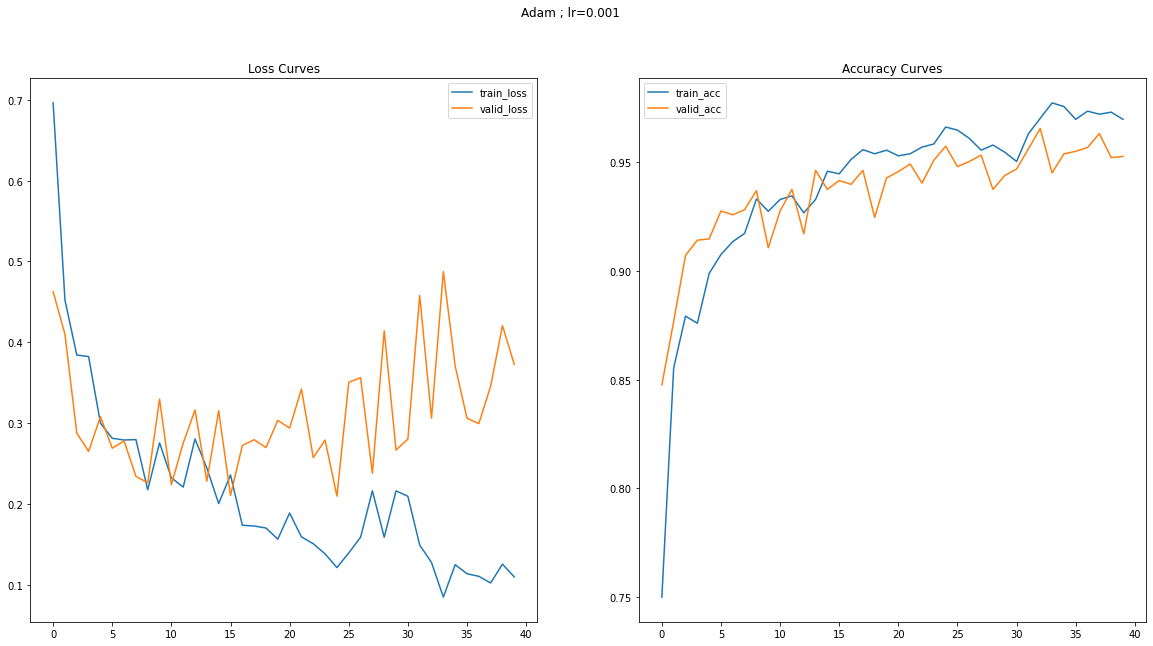

In [37]:
loss_acc_visuaize(history,optim='Adam ; lr=0.001',path='../lr=0.001')

ADAM is performing significantly better than SGD. We may consider it in our final model.
Also if we keep running it for more epochs we may get higher accuracy.

In [39]:
model = base_model_build()
model.load_state_dict(torch.load("../vgg16-transfer-adam-lr=0.001"))

training on gpu...


<All keys matched successfully>

tensor([[1.1697e-10, 1.8313e-04, 8.6467e-10, 2.9411e+09]], device='cuda:0')


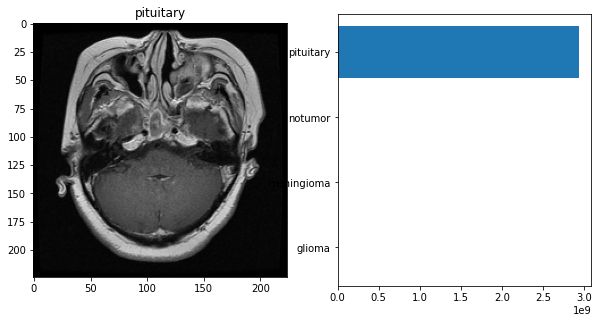

In [40]:
visual_predict(model)

### 5.4.4.b Accuracy for ADAM for with Learning Rate 0.001 <a class="anchor" id="h5_4_4b"></a>

In [41]:
adam_lr001_dict = class_accuracies(model=model)

Accuracy for class pituitary :  0.9702517162471396
Accuracy for class notumor :  0.9832635983263598
Accuracy for class meningioma :  0.9451371571072319
Accuracy for class glioma :  0.8914141414141414


ADAM is giving comparatively better accuracy than SGD.

### 5.4.5 Implementing ADAM with learning rate 0.05 <a class="anchor" id="h5_4_5"></a>

In [42]:
vgg16 = base_model_build()
optimizer_adam = optim.Adam(vgg16.classifier.parameters(), lr=0.05)

model=vgg16
criterion=criterion
optimizer=optimizer_adam
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-sgd-lr=0.05'
max_epochs_stop=10
n_epochs=20
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 96.06 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 5778.2332 	Validation Loss: 124.3034
		Training Accuracy: 55.86%	 Validation Accuracy: 68.22%
Epoch: 1	100.00% complete. 97.16 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 319.4977 	Validation Loss: 16.8994
		Training Accuracy: 57.45%	 Validation Accuracy: 65.30%
Epoch: 2	100.00% complete. 97.77 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 146.8472 	Validation Loss: 3.1921
		Training Accuracy: 52.03%	 Validation Accuracy: 50.47%
Epoch: 3	100.00% complete. 97.22 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 113.5768 	Validation Loss: 1.5769
		Training Accuracy: 42.58%	 Validation Accuracy: 41.82%
Epoch: 4	100.00% complete. 97.79 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 22.1335 	Validation Loss: 1.1077
		Training Accuracy: 39.67%	 Validation Accuracy: 44.04%
Epoch: 5	100.00% complete. 96.87 seconds elapsed in epoch.
Epoch: 5 	T

## Loss and Accuracy curve for ADAM with leaining rate 0.05 <a class="anchor" id="h5_4_5p"></a>

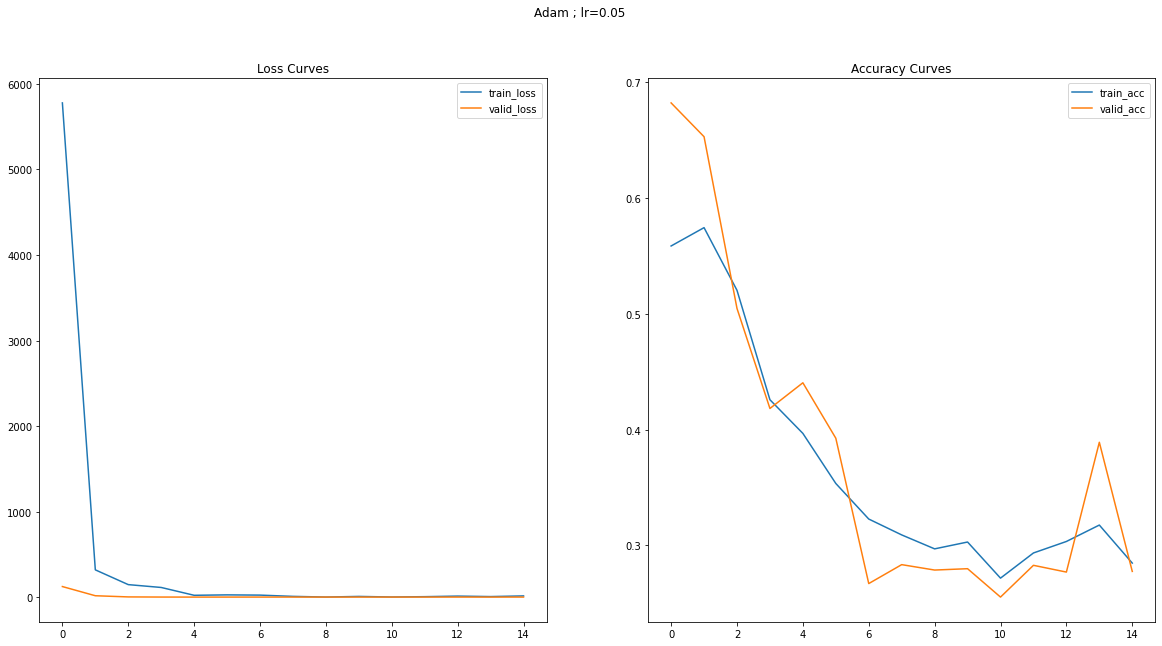

In [43]:
loss_acc_visuaize(history,optim='Adam ; lr=0.05',path='../lr=0.05')

ADAM with learning rate 0.05 is giving faster convergence rate (our early stopping criteria triggers here) but sprisingly the accuracy is getting lowers per iteration . We can conclude that ADAM with learning rate 0.05 is converging to a local minima for our case.

### 5.4.6 Implementing RMSprop with learning rate 0.001 <a class="anchor" id="h5_4_6"></a>

RMSprop is a gradient-based optimization technique used in training neural networks. It was proposed by the father of back-propagation, Geoffrey Hinton. Gradients of very complex functions like neural networks have a tendency to either vanish or explode as the data propagates through the function (refer to vanishing gradients problem). Rmsprop was developed as a stochastic technique for mini-batch learning.


RMSprop uses a moving average of squared gradients to normalize the gradient. This normalization balances the step size (momentum), decreasing the step for large gradients to avoid exploding and increasing the step for small gradients to avoid vanishing.
Simply put, RMSprop uses an adaptive learning rate instead of treating the learning rate as a hyperparameter. This means that the learning rate changes over time.

Algorithm for RMSprop:
![**RMSprop Algorithm**](https://i.stack.imgur.com/DOxXH.png)
[source](https://www.pythonfixing.com/2022/06/fixed-rmsprop-in-tf-vs-pytorch.html/)

In [44]:
vgg16 = base_model_build()
optimizer_adam = optim.RMSprop(vgg16.classifier.parameters(), lr=0.001)

model=vgg16
criterion=criterion
optimizer=optimizer_adam
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-rmsprop-lr=0.001'
max_epochs_stop=20
n_epochs=40
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 96.86 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 52.5295 	Validation Loss: 0.4538
		Training Accuracy: 70.02%	 Validation Accuracy: 86.16%
Epoch: 1	100.00% complete. 98.66 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.4012 	Validation Loss: 0.3709
		Training Accuracy: 85.89%	 Validation Accuracy: 87.27%
Epoch: 2	100.00% complete. 97.99 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.3440 	Validation Loss: 0.2933
		Training Accuracy: 87.66%	 Validation Accuracy: 90.07%
Epoch: 3	100.00% complete. 98.62 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.3517 	Validation Loss: 0.3880
		Training Accuracy: 88.56%	 Validation Accuracy: 84.70%
Epoch: 4	100.00% complete. 96.21 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.2668 	Validation Loss: 0.2677
		Training Accuracy: 90.80%	 Validation Accuracy: 92.41%
Epoch: 5	100.00% complete. 96.37 seconds elapsed in epoch.
Epoch: 5 	Training Loss

## Loss and Accuracy curve for RMSprop with learning rate 0.001 <a class="anchor" id="h5_4_6p"></a>

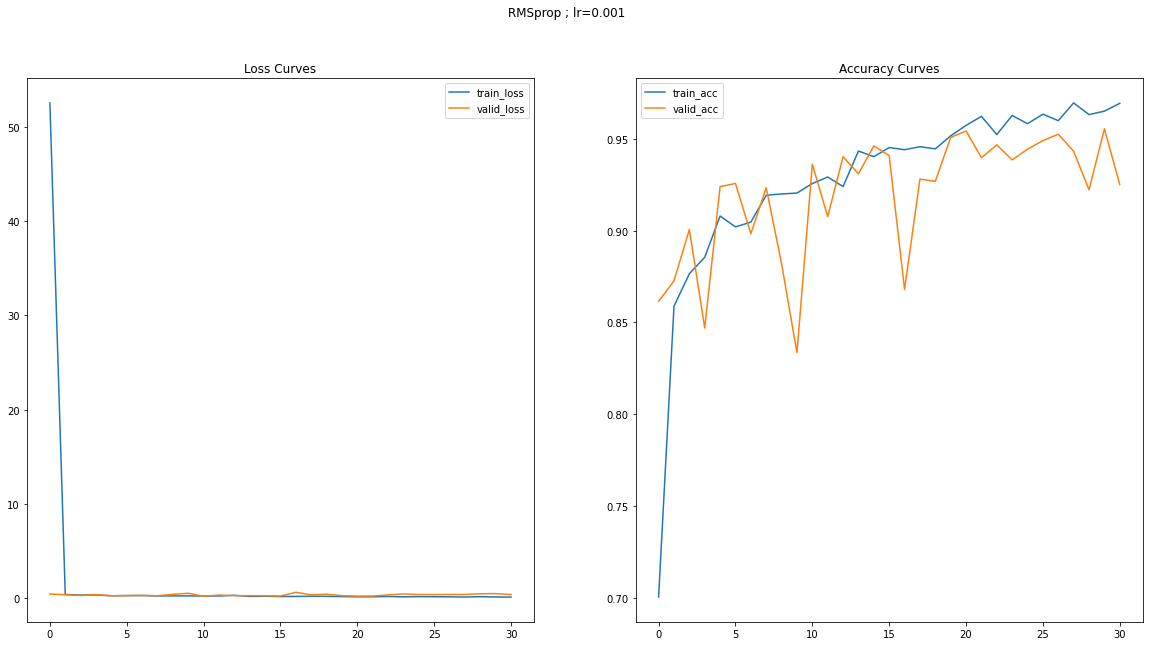

In [45]:
loss_acc_visuaize(history, optim='RMSprop ; lr=0.001',path='../lr=0.001')

RMSprop is also performing well for our model. The loss curve is getting lower at a very faster rate. We may consider it for our final model.

In [47]:
model = base_model_build()
model.load_state_dict(torch.load("../vgg16-transfer-rmsprop-lr=0.001"))

training on gpu...


<All keys matched successfully>

tensor([[5.9218e-03, 1.3853e+02, 5.3084e+07, 3.4707e-03]], device='cuda:0')


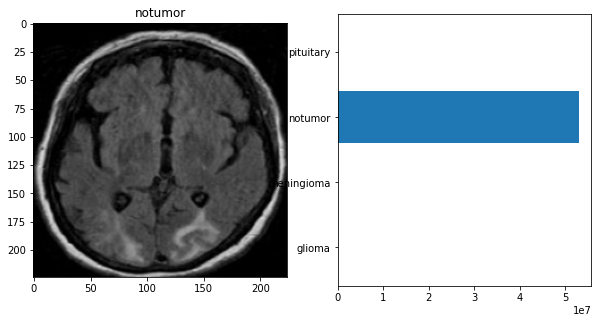

In [48]:
visual_predict(model)

### 5.4.6.b  Accuracy for RMSprop with learning rate 0.001 <a class="anchor" id="h5_4_6b"></a>

In [49]:
rmsprop_lr001_dict=class_accuracies(model)

Accuracy for class pituitary :  0.9862700228832952
Accuracy for class notumor :  0.9916317991631799
Accuracy for class meningioma :  0.8329177057356608
Accuracy for class glioma :  0.9191919191919192


### 5.4.7 Implementing RMSprop with learning rate 0.05 <a class="anchor" id="h5_4_7"></a>

In [50]:
# RMSprop with high learning rate

vgg16 = base_model_build()
optimizer_adam = optim.RMSprop(vgg16.classifier.parameters(), lr=0.05)

model=vgg16
criterion=criterion
optimizer=optimizer_adam
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-sgd-1'
max_epochs_stop=20
n_epochs=40
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 97.04 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 3212112.4120 	Validation Loss: 6247.6993
		Training Accuracy: 62.15%	 Validation Accuracy: 70.91%
Epoch: 1	100.00% complete. 98.33 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 5430.5096 	Validation Loss: 1173.4553
		Training Accuracy: 73.78%	 Validation Accuracy: 82.13%
Epoch: 2	100.00% complete. 98.11 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 2248.9923 	Validation Loss: 468.4387
		Training Accuracy: 75.39%	 Validation Accuracy: 84.23%
Epoch: 3	100.00% complete. 96.24 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 1243.8961 	Validation Loss: 396.8800
		Training Accuracy: 76.57%	 Validation Accuracy: 81.54%
Epoch: 4	100.00% complete. 97.87 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 950.5975 	Validation Loss: 177.3805
		Training Accuracy: 75.84%	 Validation Accuracy: 70.74%
Epoch: 5	100.00% complete. 97.24 seconds elapsed in ep

## Loss and Accuracy plot for RMSprop with learning rate 0.05 <a class="anchor" id="h5_4_7p"></a>

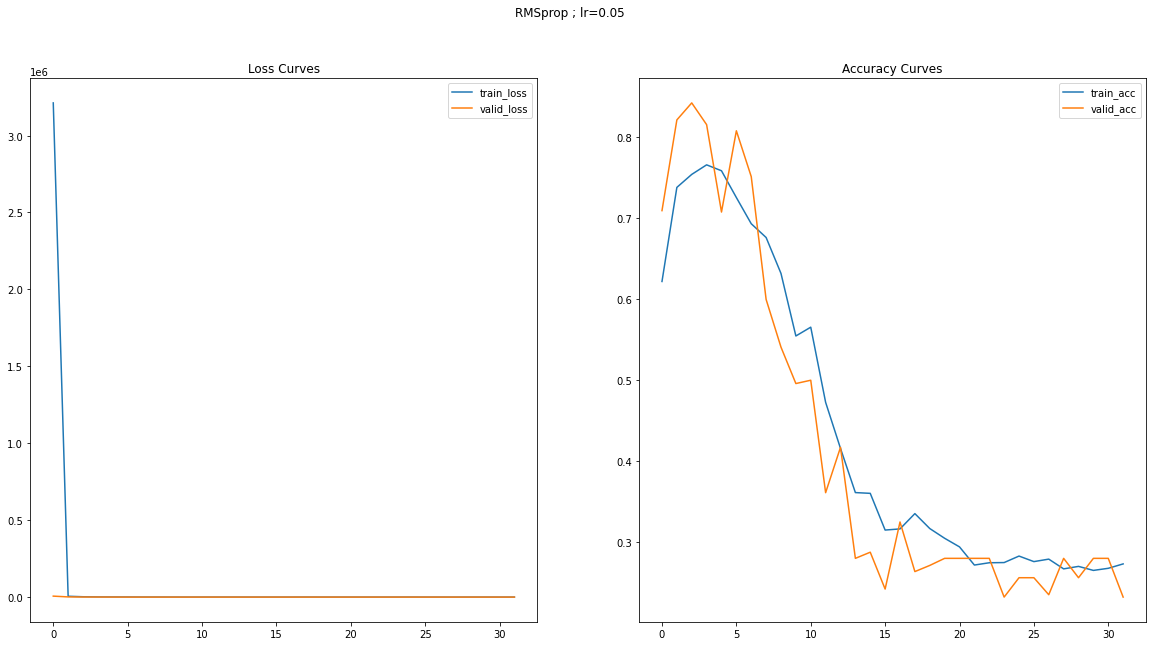

In [51]:
loss_acc_visuaize(history, optim='RMSprop ; lr=0.05',path='../lr=0.05')

The rate of convergence is very high but the accurace is getting low per epochs. We will not use RMSprop with learning rate 0.05 for our final model.

In [53]:
model = base_model_build()
model.load_state_dict(torch.load("../vgg16-transfer-sgd-1"))

training on gpu...


<All keys matched successfully>

tensor([[1.6392, 1.6720, 1.0118, 1.3058]], device='cuda:0')


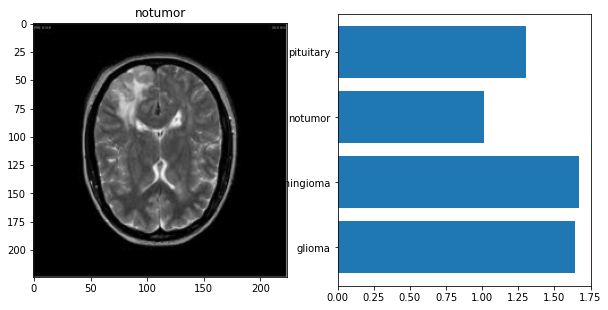

In [54]:
visual_predict(model)

### 5.4.7.b  Accuracy for RMSprop with learning rate 0.05 <a class="anchor" id="h5_4_7b"></a>

In [55]:
_=class_accuracies(model)

Accuracy for class pituitary :  0.0
Accuracy for class notumor :  0.04602510460251046
Accuracy for class meningioma :  1.0
Accuracy for class glioma :  0.0


Surprisingly the accuracy is very bad here. We will definitely drop it in our final model.

### 5.4.8 Implementing Adagrad with learning rate 0.001 <a class="anchor" id="h5_4_8"></a>

The adaptive gradient descent algorithm is slightly different from other gradient descent algorithms. This is because it uses different learning rates for each iteration. The change in learning rate depends upon the difference in the parameters during training. The more the parameters get change, the more minor the learning rate changes. This modification is highly beneficial because real-world datasets contain sparse as well as dense features. So it is unfair to have the same value of learning rate for all the features.


![**Adagrad**](https://miro.medium.com/max/700/1*XWvo73EMLhIeGs35xkimVw.png)
[source](https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html#adagrad)


In [56]:
vgg16 = base_model_build()
optimizer_adam = optim.Adagrad(vgg16.classifier.parameters(), lr=0.001)

model=vgg16
criterion=criterion
optimizer=optimizer_adam
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-adagrad-lr=0.001'
max_epochs_stop=20
n_epochs=40
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 97.05 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.6705 	Validation Loss: 0.4702
		Training Accuracy: 74.92%	 Validation Accuracy: 83.35%
Epoch: 1	100.00% complete. 94.18 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.3011 	Validation Loss: 0.2786
		Training Accuracy: 88.87%	 Validation Accuracy: 90.54%
Epoch: 2	100.00% complete. 94.18 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.2398 	Validation Loss: 0.2354
		Training Accuracy: 90.76%	 Validation Accuracy: 92.64%
Epoch: 3	100.00% complete. 92.89 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.1932 	Validation Loss: 0.2194
		Training Accuracy: 92.91%	 Validation Accuracy: 92.87%
Epoch: 4	100.00% complete. 94.54 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.1584 	Validation Loss: 0.2230
		Training Accuracy: 94.26%	 Validation Accuracy: 92.76%
Epoch: 5	100.00% complete. 98.99 seconds elapsed in epoch.
Epoch: 5 	Training Loss:

## Loss and Accuracy curve for AdaGrad with loss 0.001 <a class="anchor" id="h5_4_7p"></a>

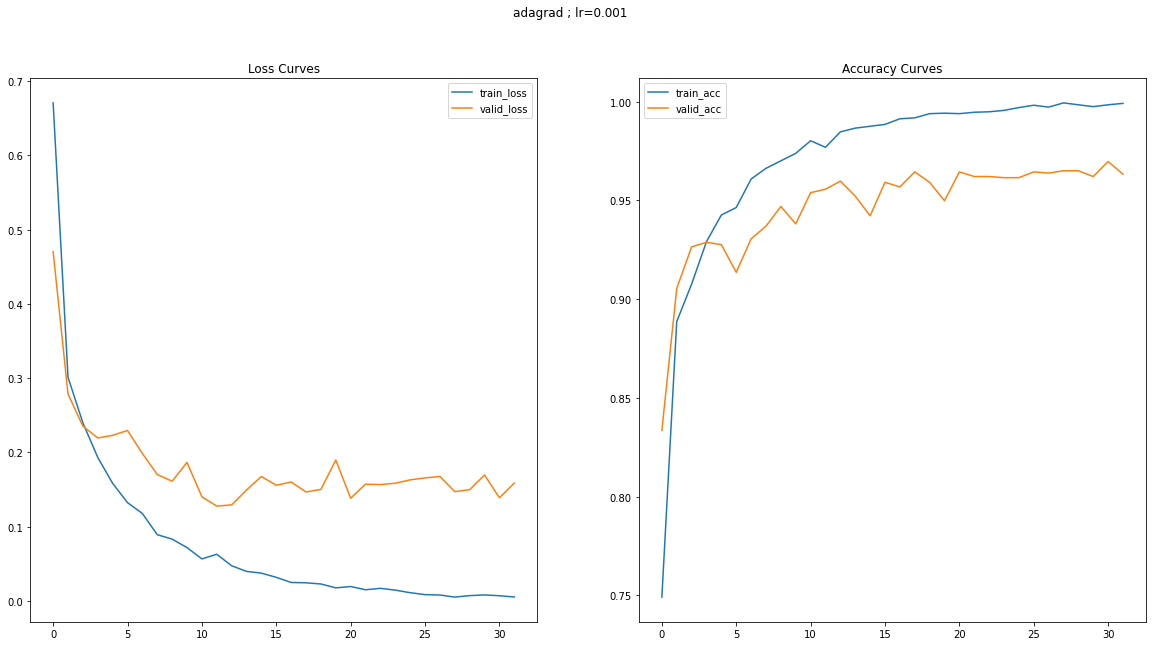

In [57]:
loss_acc_visuaize(history,optim="adagrad ; lr=0.001",path="../lr=0.001")

Here the convergence rate is consistent but bit a slower than other algorithms. An initial higher learning rate will perform better here.

In [59]:
model = base_model_build()
model.load_state_dict(torch.load("../vgg16-transfer-adagrad-lr=0.001"))

training on gpu...


<All keys matched successfully>

tensor([[3.8735e-01, 2.2483e+02, 7.4556e-01, 2.6560e-03]], device='cuda:0')


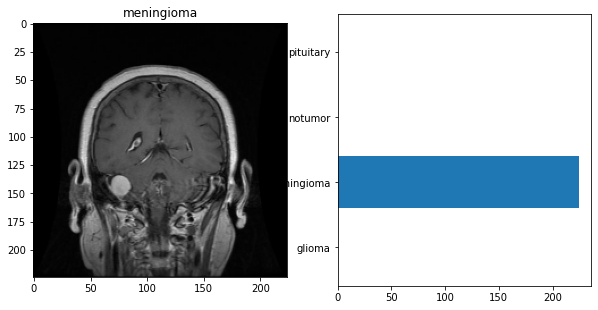

In [60]:
visual_predict(model)

### 5.4.8.b Accuracy for AdaGrad with Learning Rate 0.001 <a class="anchor" id="h5_4_8b"></a>

In [61]:
adagrad_dict_lr001=class_accuracies(model)

Accuracy for class pituitary :  0.9794050343249427
Accuracy for class notumor :  0.9832635983263598
Accuracy for class meningioma :  0.940149625935162
Accuracy for class glioma :  0.9090909090909091


### 5.4.9 Implementing Adagrad with learning rate 0.05 <a class="anchor" id="h5_4_9"></a>

In [62]:
# adagrad ; high learning rate

vgg16 = base_model_build()
optimizer_adam = optim.Adagrad(vgg16.classifier.parameters(), lr=0.05)

model=vgg16
criterion=criterion
optimizer=optimizer_adam
train_loader=train_loader
valid_loader=valid_loader
save_file_name='../vgg16-transfer-adagrad-lr=0.05'
max_epochs_stop=20
n_epochs=40
print_every=1

"""Train a PyTorch Model

Params
--------
    model (PyTorch model): cnn to train
    criterion (PyTorch loss): objective to minimize
    optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
    train_loader (PyTorch dataloader): training dataloader to iterate through
    valid_loader (PyTorch dataloader): validation dataloader used for early stopping
    save_file_name (str ending in '.pt'): file path to save the model state dict
    max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
    n_epochs (int): maximum number of training epochs
    print_every (int): frequency of epochs to print training stats

Returns
--------
    model (PyTorch model): trained cnn with best weights
    history (DataFrame): history of train and validation loss and accuracy
"""

# Early stopping intialization
epochs_no_improve = 0
valid_loss_min = np.Inf

valid_max_acc = 0
history = []
bias_grads1 = []
weight_grads1 = []
bias_grads2 = []
weight_grads2 = []
bias_grads3 = []
weight_grads3 = []


# Number of epochs already trained (if using loaded in model weights)
try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

overall_start = timer()

# Main loop
for epoch in range(n_epochs):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()
    start = timer()

    # Training loop
    for ii, (data, target) in enumerate(train_loader):
        # Tensors to gpu
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        # Predicted outputs are log probabilities
        output = model(data)

        # Loss and backpropagation of gradients
        loss = criterion(output, target)
        loss.backward()

        # Update the parameters
        optimizer.step()
        
        weight_grads1.append(np.linalg.norm(model.classifier[0].weight.grad.cpu().numpy()))
        bias_grads1.append(np.linalg.norm(model.classifier[0].bias.grad.cpu().numpy()))
        weight_grads2.append(np.linalg.norm(model.classifier[3].weight.grad.cpu().numpy()))
        bias_grads2.append(np.linalg.norm(model.classifier[3].bias.grad.cpu().numpy()))
        weight_grads3.append(np.linalg.norm(model.classifier[6].weight.grad.cpu().numpy()))
        bias_grads3.append(np.linalg.norm(model.classifier[6].bias.grad.cpu().numpy()))



        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

        # Track training progress
        print(
            f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
            end='\r')

    # After training loops ends, start validation
    else:
        model.epochs += 1

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)

            # Calculate average losses
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

            # Calculate average accuracy
            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(valid_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            # Print training and validation results
            if (epoch + 1) % print_every == 0:
                print(
                    f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                )
                print(
                    f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                )

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name)
                # Track improvement
                epochs_no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            # Otherwise increment count of epochs with no improvement
            else:
                epochs_no_improve += 1
                # Trigger early stopping
                if epochs_no_improve >= max_epochs_stop:
                    print(
                        f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                    )
                    total_time = timer() - overall_start
                    print(
                        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                    )

                    # Load the best state dict
                    model.load_state_dict(torch.load(save_file_name))
                    # Attach the optimizer
                    model.optimizer = optimizer

                    # Format history
                    history = pd.DataFrame(
                        history,
                        columns=[
                            'train_loss', 'valid_loss', 'train_acc',
                            'valid_acc'
                        ])
                    break

# Attach the optimizer
model.optimizer = optimizer
# Record overall time and print out stats
total_time = timer() - overall_start
print(
    f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
)
print(
    f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
)
# Format history
history = pd.DataFrame(
    history,
    columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

training on gpu...
Starting Training from Scratch.

Epoch: 0	100.00% complete. 99.97 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 4716.9246 	Validation Loss: 4.2427
		Training Accuracy: 61.99%	 Validation Accuracy: 81.72%
Epoch: 1	100.00% complete. 98.77 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 5.9476 	Validation Loss: 1.6790
		Training Accuracy: 76.90%	 Validation Accuracy: 85.28%
Epoch: 2	100.00% complete. 100.40 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 2.6848 	Validation Loss: 1.0160
		Training Accuracy: 79.01%	 Validation Accuracy: 84.05%
Epoch: 3	100.00% complete. 100.49 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 1.9239 	Validation Loss: 0.7025
		Training Accuracy: 79.95%	 Validation Accuracy: 85.28%
Epoch: 4	100.00% complete. 100.14 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 1.5634 	Validation Loss: 0.6485
		Training Accuracy: 80.52%	 Validation Accuracy: 88.08%
Epoch: 5	100.00% complete. 99.64 seconds elapsed in epoch.
Epoch: 5 	Training

## Loss and Accuracy Curve for AdaGrad with learning rate 0.05 <a class="anchor" id="h5_4_9p"></a>

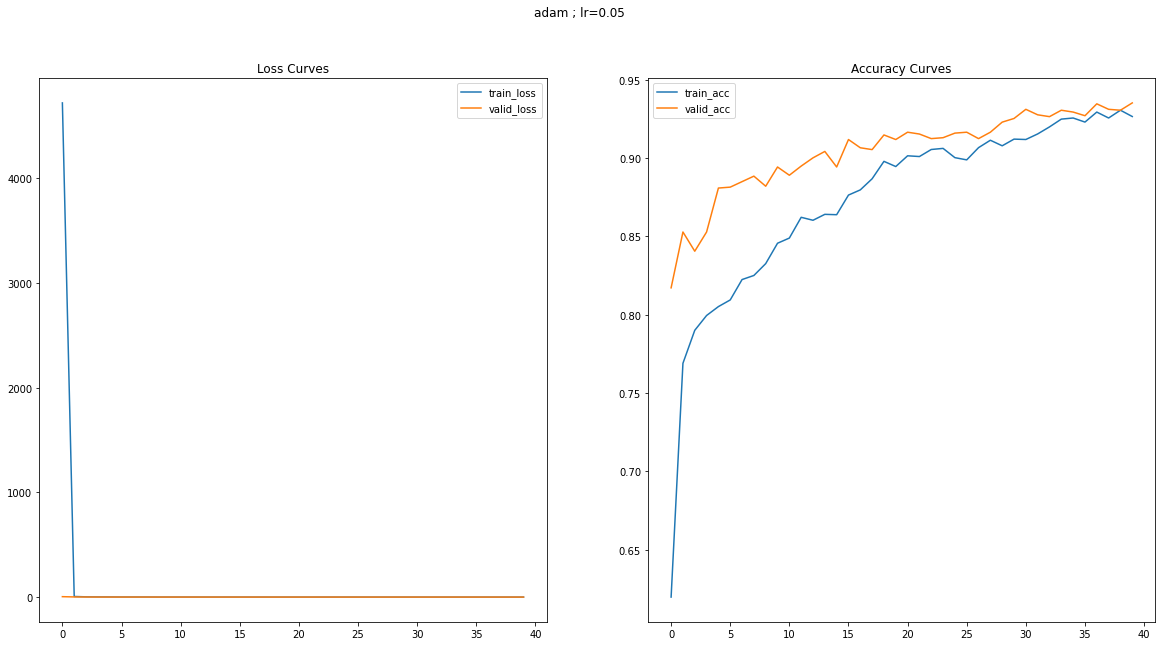

In [63]:
loss_acc_visuaize(history,optim="adagrad ; lr=0.05", path="../lr=0.05")

Convergence rate is faster here as we take a higher initial learning rate.

In [65]:
model = base_model_build()
model.load_state_dict(torch.load("../vgg16-transfer-adagrad-lr=0.05"))

training on gpu...


<All keys matched successfully>

tensor([[1.1542e+03,        inf,        inf, 1.2315e+26]], device='cuda:0')


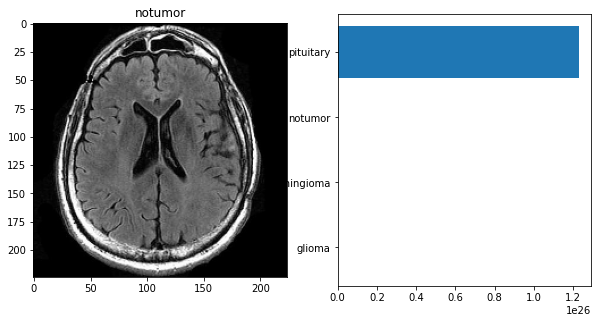

In [66]:
visual_predict(model)

### 5.4.9.b Accuracy for adagrad with learning rate 0.05 <a class="anchor" id="h5_4_9b"></a>

In [67]:
adagrad_dict_lr05=class_accuracies(model)

Accuracy for class pituitary :  0.9794050343249427
Accuracy for class notumor :  0.5334728033472803
Accuracy for class meningioma :  0.9351620947630923
Accuracy for class glioma :  0.8232323232323232


Accuracy for no tumor is very low here. We have to run our model for more epochs to get a very good accuracy.

## 5.5 Overall accuracies of different optimizers for different classes <a class="anchor" id="h5_5"></a>

In [68]:
optims = ['sgd_lr001','sgd_lr05','adam_lr001','rmsprop_lr001','adagrad_lr001','adagrad_lr05']
classcounts = {}
for c in classes:
    classcounts[str(c)] = [sgd_lr001_dict[str(c)],sgd_lr05_dict[str(c)],adam_lr001_dict[str(c)],rmsprop_lr001_dict[str(c)],adagrad_dict_lr001[str(c)],adagrad_dict_lr05[str(c)]]

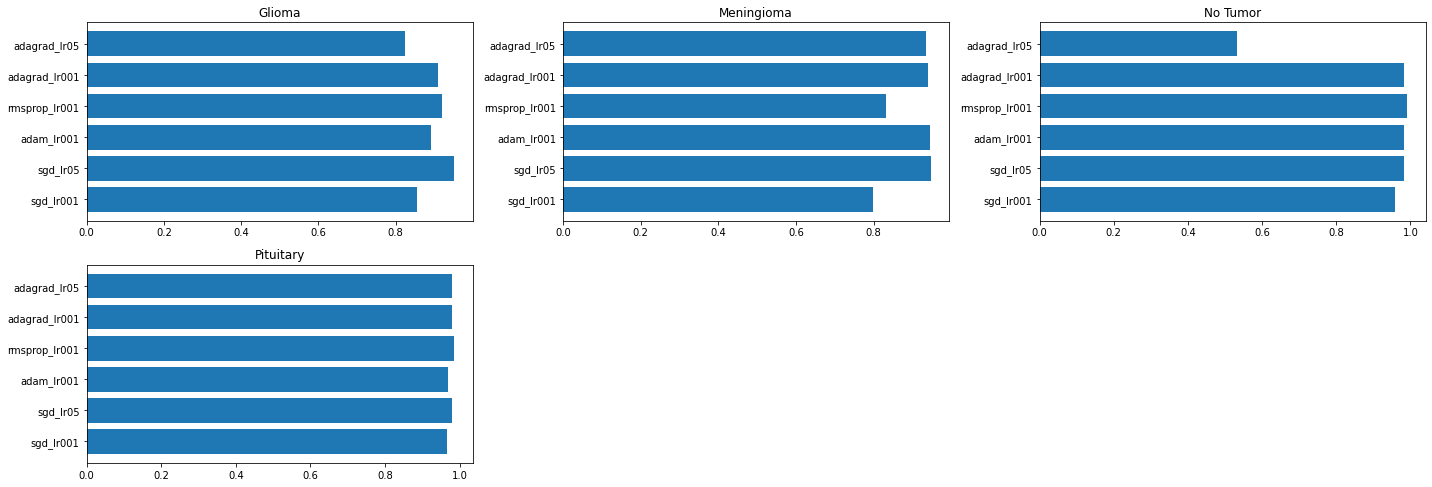

In [69]:
plt.figure(figsize=(20,10))

plt.subplot(331)
plt.barh(optims,classcounts['glioma'])
plt.title('Glioma')

plt.subplot(332)
plt.barh(optims,classcounts['meningioma'])
plt.title('Meningioma')

plt.subplot(333)
plt.barh(optims,classcounts['notumor'])
plt.title('No Tumor')

plt.subplot(334)
plt.barh(optims,classcounts['pituitary'])
plt.title('Pituitary')


plt.tight_layout()

## 5.6 Creating a new model from scratch using the previous results to improve the accuracy <a class="anchor" id="h5_6"></a>

<hr><font color="green"><h1>from file: Ujjwal-Chowdhury-2</h1></font>

Now I shall do some modifications in VGG architecture to boost the accuracy. I am applying some batch normalization techniques after the convolution layer and then feeding the values to the activation function. Batch normalization is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.

The dropout regularization is introduced in the fully-connected layers. Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.

Here we will be using Tensorflow for model creation as computational cost of trainig pytorch version of our modified model is very high and it is taking a lots of time for each epoch.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.utils import class_weight
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import LabelBinarizer


import tensorflow as tf
from tensorflow.keras import optimizers ,losses


import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
training_path = '../input/brain-tumor-mri-dataset/Training'
testing_path = '../input/brain-tumor-mri-dataset/Testing'

In [3]:
Generator = ImageDataGenerator(rescale = 1./255,
                              validation_split = 0.15)

targetSize = (150, 150)

target_labels = ["glioma", "meningioma", "notumor", "pituitary"]
train_gen = Generator.flow_from_directory(training_path,
                                          target_size = targetSize,
                                          color_mode = 'rgb',
                                          classes = target_labels,
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                         subset = 'training')

val_gen = Generator.flow_from_directory(training_path,
                                        target_size = targetSize,
                                        color_mode = 'rgb',
                                        classes = target_labels,
                                        class_mode = 'categorical',
                                        batch_size = 32,
                                        shuffle = True,
                                        subset = 'validation')


print("Training batch classes: ", train_gen.class_indices)
print("Validation batch classes: ", val_gen.class_indices)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Training batch classes:  {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Validation batch classes:  {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [4]:
model = Sequential([
    layers.Conv2D(input_shape = (targetSize[0], targetSize[1], 3), filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.Conv2D(filters = 64,kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "same"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = "same"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = "same"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters = 512, kernel_size =(3, 3), padding = "same", activation = "relu"),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = "same"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Flatten(),
    layers.Dense(units = 4096, activation = "relu"),
    layers.Dropout(0.1, seed = 5),
    layers.Dense(units = 4096, activation = "relu"),
    layers.Dense(units = 4, activation = "softmax"),
])

model.compile(optimizer = optimizers.Adam(learning_rate = 0.0005), loss = losses.categorical_crossentropy, metrics = ['accuracy'])
model.summary()

2022-07-05 15:22:06.261007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 15:22:06.387395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 15:22:06.388162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 15:22:06.389411: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       1

## Modified Model Diagrom

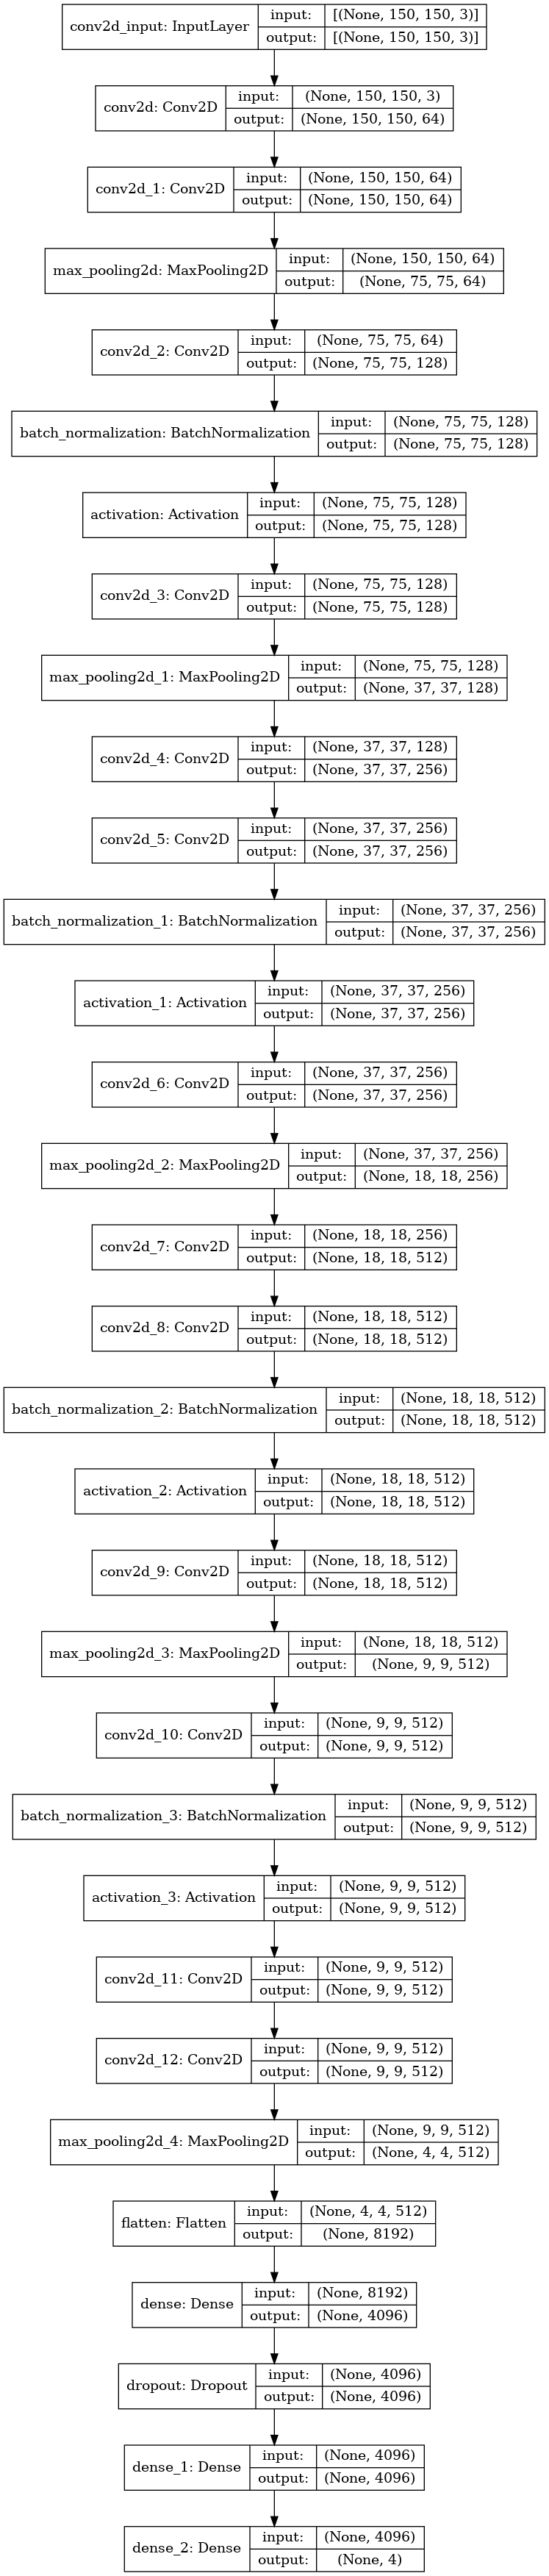

In [5]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

# Model training

EarlyStopping helps us to stop the training of the model early if there is no increase in the parameter which is setted to be monitored in EarlyStopping.

In this case we monitoring validation accuracy by passing val_acc to EarlyStopping.

Patience is setted to 5 which means that the model will stop training if it doesnâ€™t see any increase in validation accuracy after 5 epochs.

In [6]:
early = EarlyStopping(monitor = 'val_acc',
                      min_delta = 0,
                      patience = 5,
                      verbose = 1,
                      mode = 'auto')

In [7]:
epochs_count1 = 40
History = model.fit(train_gen,
                    epochs = epochs_count1,
                    verbose = 1,
                    validation_data = val_gen,
                   callbacks = [early])

2022-07-05 15:22:10.717696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-07-05 15:22:12.904228: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


152/152 [==============================] - 48s 249ms/step - loss: 1.1541 - accuracy: 0.5337 - val_loss: 3.3598 - val_accuracy: 0.2316
Epoch 2/40
152/152 [==============================] - 22s 146ms/step - loss: 0.5924 - accuracy: 0.7597 - val_loss: 4.3360 - val_accuracy: 0.2316
Epoch 3/40
152/152 [==============================] - 22s 147ms/step - loss: 0.4634 - accuracy: 0.8213 - val_loss: 0.9706 - val_accuracy: 0.6023
Epoch 4/40
152/152 [==============================] - 23s 147ms/step - loss: 0.3852 - accuracy: 0.8505 - val_loss: 0.7781 - val_accuracy: 0.7404
Epoch 5/40
152/152 [==============================] - 22s 144ms/step - loss: 0.3644 - accuracy: 0.8604 - val_loss: 2.0002 - val_accuracy: 0.5088
Epoch 6/40
152/152 [==============================] - 23s 148ms/step - loss: 0.3205 - accuracy: 0.8806 - val_loss: 0.7214 - val_accuracy: 0.7544
Epoch 7/40
152/152 [==============================] - 22s 145ms/step - loss: 0.2798 - accuracy: 0.8925 - val_loss: 1.3349 - val_accuracy: 0.6

In [8]:
def plot_training_metrics(modelHistory, epochs_Count):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
    t = f.suptitle('Model Performance', fontsize = 12)
    f.subplots_adjust(top = 0.85, wspace = 0.3)

    epoch_list = list(range(1, epochs_Count + 1))

    ax1.plot(epoch_list, modelHistory.history['accuracy'], label = 'Training Accuracy')
    ax1.plot(epoch_list, modelHistory.history['val_accuracy'], label = 'Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs_Count+1, 2))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch') 
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc = "best")

    ax2.plot(epoch_list, modelHistory.history['loss'], label = 'Training Loss')
    ax2.plot(epoch_list, modelHistory.history['val_loss'], label = 'Validation Loss')
    ax2.set_xticks(np.arange(0, epochs_Count + 1, 2))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc = "best")

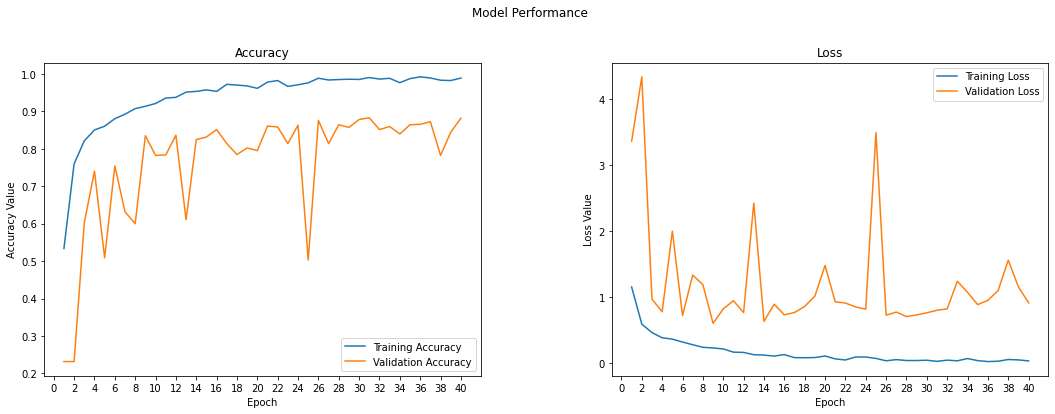

In [9]:
plot_training_metrics(History, epochs_count1)

# Model testing

In [10]:
test_gen = Generator.flow_from_directory(testing_path,
                                        target_size = targetSize,
                                        color_mode = 'rgb',
                                        classes = target_labels,
                                        class_mode = 'categorical',
                                        batch_size = 1,
                                        shuffle = True)

Found 1311 images belonging to 4 classes.


In [11]:
def test_model(model, test_generator):
    y_pred = model.predict(x = test_generator, verbose = 1)
    print(y_pred.shape)
    print(y_pred[:10])
    return y_pred

In [12]:
y_pred = test_model(model, test_gen)
print(y_pred[:10])

1311/1311 [==============================] - 10s 7ms/step
(1311, 4)
[[3.5530936e-22 4.7365828e-17 7.4527748e-31 1.0000000e+00]
 [4.8665067e-19 8.8277311e-12 1.0000000e+00 1.1729394e-20]
 [1.9390583e-12 1.0256137e-08 1.0000000e+00 4.5865018e-14]
 [2.9239501e-18 1.1850801e-13 1.5659249e-19 1.0000000e+00]
 [1.0000000e+00 3.7297818e-10 2.3060067e-16 1.2603449e-09]
 [3.0797992e-19 9.8665125e-15 1.0000000e+00 4.5379970e-22]
 [1.0000000e+00 3.7216236e-10 1.0231043e-17 5.7326545e-13]
 [8.8366657e-01 1.1633337e-01 1.8213250e-08 2.2861096e-08]
 [1.2113949e-15 2.3142723e-09 1.0000000e+00 5.4088930e-17]
 [4.7500825e-09 1.0000000e+00 3.9167630e-10 2.1991979e-09]]
[[3.5530936e-22 4.7365828e-17 7.4527748e-31 1.0000000e+00]
 [4.8665067e-19 8.8277311e-12 1.0000000e+00 1.1729394e-20]
 [1.9390583e-12 1.0256137e-08 1.0000000e+00 4.5865018e-14]
 [2.9239501e-18 1.1850801e-13 1.5659249e-19 1.0000000e+00]
 [1.0000000e+00 3.7297818e-10 2.3060067e-16 1.2603449e-09]
 [3.0797992e-19 9.8665125e-15 1.0000000e+00 4.

In [13]:
Y_pred = (y_pred > 0.5).astype(int)
print(Y_pred[:10])

[[0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]]


**Confusion matrices**

In [14]:
print(test_gen.labels[:10])

[0 0 0 0 0 0 0 0 0 0]


In [15]:
labelBinarizer = LabelBinarizer()
test_labels = labelBinarizer.fit_transform(test_gen.labels)
print(test_labels[:10])

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [16]:
def plot_cf_matrix(confusion_matrix, axes, class_label, class_names, fontsize = 14):
    df_cm = pd.DataFrame(confusion_matrix, index = class_names, columns = class_names,)

    try:
        heatmap = sns.heatmap(df_cm, annot = True, fmt = "d", cbar = False, ax = axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("class : " + class_label)

In [17]:
def plot_confusion_matrices(conf_matrices, target_labels):
    fig, ax = plt.subplots(1, len(target_labels), figsize = (20, 4))

    for axes, cfs_matrix, label in zip(ax.flatten(), conf_matrices, target_labels):
        plot_cf_matrix(cfs_matrix, axes, label, ["NO", "YES"])

    fig.tight_layout()
    plt.show()

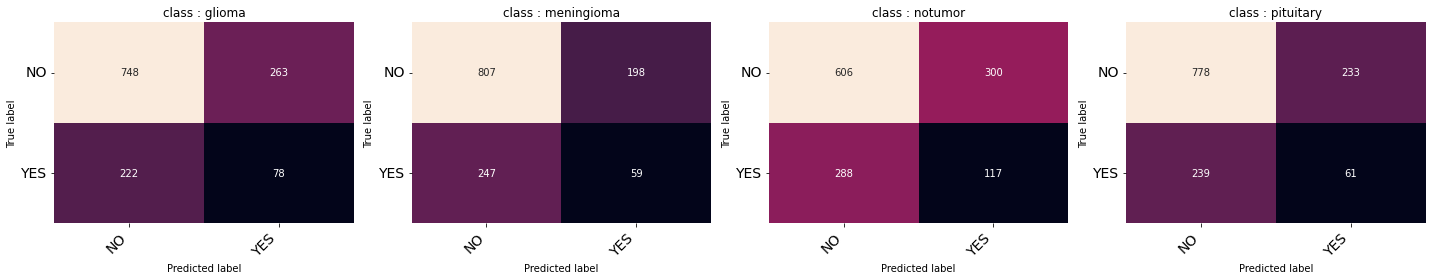

In [18]:
conf_matrices = multilabel_confusion_matrix(y_true = test_labels, 
                                            y_pred = Y_pred, 
                                            labels = [0, 1, 2, 3])

plot_confusion_matrices(conf_matrices, target_labels)

# 6. Results <a class="anchor" id="h6"></a>

My Modified Model works really good for for fitting the training data and validation data. Our Training dataset is limited but  it is giving 99 percent accuracy after 40 epchos in training data and giving more than 92% accuracy for the validation set.

We know that if the dataset is large then Deep Learning Models performs better than other Machine Learning Models, but with a relativly smaller dataset , the model I have created is giving a very accpetable amount of accuracy.

This Deep Neural Network Model architecture is giving more accuracy than VGG16. The time per epochs is also less here as it is using batch normalization before feeding the values into the RELU activation function. Batch normalization is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling. This helps during the backpropogation. The fullyconnected layers are embaeded with dropuout regularization, which further helps in increasing the accuracy.

From the confusion matrix we can say that this model is having hard time classifying the no tumor class images, this is maybe a drawback of this model but none the less it is better compare to VGG16.

If the dataset size can be increaded ,the model can reach higher accuracy. So my future work would be adding more data into the dataset and experiment with different augmentations.

# Reference <a class="anchor" id="r"></a>


[An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/index.html)

[A Comprehensive Guide on Deep Learning Optimizers](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/)

[Understanding All Optimizers In Deep Learning](https://krishnaik.in/2022/03/28/understanding-all-optimizers-in-deep-learning/)

[VGG16-pytorch implementation on CIFAR10 dataset](https://www.kaggle.com/code/datastrophy/vgg16-pytorch-implementation/notebook)

[Python Count Number of Files in a Directory](https://pynative.com/python-count-number-of-files-in-a-directory/)

[Split data directory into training and test directory with sub directory structure preserved](https://stackoverflow.com/questions/46717742/split-data-directory-into-training-and-test-directory-with-sub-directory-structu)

[Donâ€™t Use Dropout in Convolutional Networks](https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html)

[A Gentle Introduction to Batch Normalization for Deep Neural Networks](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)

# **<center>Thank You</center>**